# Révision - Analyse de données sur les ventes d'une librairie

# 0 - contexte et objectifs

Vous travaillez au service marketing de Lapage, une grande librairie généraliste en ligne.

Lapage était originellement une librairie physique avec plusieurs points de vente. 
Mais devant le succès de certains de ses produits et l’engouement de ses clients, 
elle a décidé depuis 2 ans d’ouvrir un site de vente en ligne. Vous intervenez car l’entreprise souhaite faire le point : analyser ses points forts, ses points faibles, les comportements clients, etc. Par exemple, elle cherche à savoir si elle doit créer certaines offres, adapter certains prix, etc.

On vous demande de faire une analyse en deux parties :

Partie I - analyse des différents indicateurs généraux

    Construire des indicateurs et graphiques autour du chiffre d'affaires. Rregarder l’évolution dans le temps
    faire un zoom sur les références, pour voir les tops et les flops, la répartition par catégorie, etc.
    etudier les profils des clients, et également la répartition du chiffre d'affaires entre eux

Partie II - comportement des clients l’objectif est cette fois-ci de comprendre le comportement des clients en ligne.

    étudier le lien entre le genre d’un client et les catégories des livres achetés
    étudier ensuite le lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés.



# 1 - Exploration et  nettoyage des données 

In [1]:
# Import de la librairie Pandas
import pandas as pd

# Import de la librairie matplotlib
import matplotlib.pyplot as plt

## 1.1 - Chargement des données

Si vous utilisez anaconda -> je vous conseille de mettre les fichiers csv dans le même répertoire que le notebook

Si vous utilisez google colab ->  il faut exécuter le code ci-dessous. 

from google.colab import files
data_to_load = files.upload()

### 1.1.1 - customers

In [2]:
# Ouverture du fichier
customers = pd.read_csv('customers.csv')

In [3]:
# Affichage des informations 
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [4]:
# Affichage des premières lignes

customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [6]:
# Stats du dataframe
customers.describe(include = 'all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_2993,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


Ce fichier comprend 3 colonnes :

    Client_id : référence de chaque client
    Sex : le genre du client
    Birth : l'année de naissance du client



In [7]:
#valeurs manquantes
customers.isna().mean()

client_id    0.0
sex          0.0
birth        0.0
dtype: float64

In [8]:
#Doublon
customers.duplicated().sum()

0

In [9]:
print("Il y a", customers.describe(include = 'all').loc["unique","client_id"], "clients uniques")

Il y a 8623 clients uniques


In [43]:
print("L'age moyen est :", 2022- round(customers.describe(include = 'all').loc["mean","birth"]), "ans")

L'age moyen est : 44 ans


In [45]:
print("La part des femmes :", round(customers.describe(include = 'all').loc["freq","sex"] / 
      customers.describe(include = 'all').loc["count","sex"],2), "%")

La part des femmes : 0.52 %


In [47]:
#calculons l'age moyen par sexe 

2022 - customers.groupby("sex").mean()

,birth
sex,
f,44.005121
m,43.408277


Le fichier customers n'a pas de valeurs nulles ni de doublons.


### 1.1.2 - products

In [11]:
# Ouverture du fichier

products = pd.read_csv('products.csv')

In [21]:
# Affichage des informations 
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [13]:
# Affichage des premières lignes

products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [14]:
#valeurs manquantes
products.isna().mean()


id_prod    0.0
price      0.0
categ      0.0
dtype: float64

In [15]:
#Doublon
products.duplicated().sum()

0

In [16]:
# Stats du dataframe

products.describe(include="all")

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,2_237,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


Votre conclusion ?



In [ ]:
#--> le dataset est clean

In [17]:
# calculer le prix moyen des produits par catégorie
products.groupby('categ').mean()

,price
categ,
0,11.727280
1,25.531421
2,108.354686


### 1.1.3 - transactions


In [18]:
# Ouverture du fichier
transactions = pd.read_csv('transactions.csv')

In [22]:
# Affichage des informations 
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [23]:
# Stats du dataframe
transactions.describe(include="all")

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [24]:
transactions.sample()

,id_prod,date,session_id,client_id
171266,1_260,2021-09-05 14:57:41.573389,s_85438,c_5022


In [27]:
#valeurs manquantes
transactions.isna().mean()


id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
dtype: float64

In [28]:
#Doublon
transactions.duplicated().sum()


126

Votre conclusion ?

Qu'est-ce qu'on remarque ? 




In [ ]:
# --> il y a des lignes de test

In [33]:
# retirer les lignes identifiées
transactions = transactions[ ~transactions['date'].str.contains("test")]
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [42]:
# Calculer le nombre d'achats par client avec groupby et calculer ensuite le nombre d'achats moyen

achats_par_client = transactions.groupby('client_id')['session_id'].count().reset_index(name="count")
achats_par_client

,client_id,count
0,c_1,39
1,c_10,58
2,c_100,8
3,c_1000,125
4,c_1001,102
...,...,...
8595,c_995,14
8596,c_996,95
8597,c_997,59
8598,c_998,53


c:\bda\tools\python-3.6.8-amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\bda\tools\python-3.6.8-amd64\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


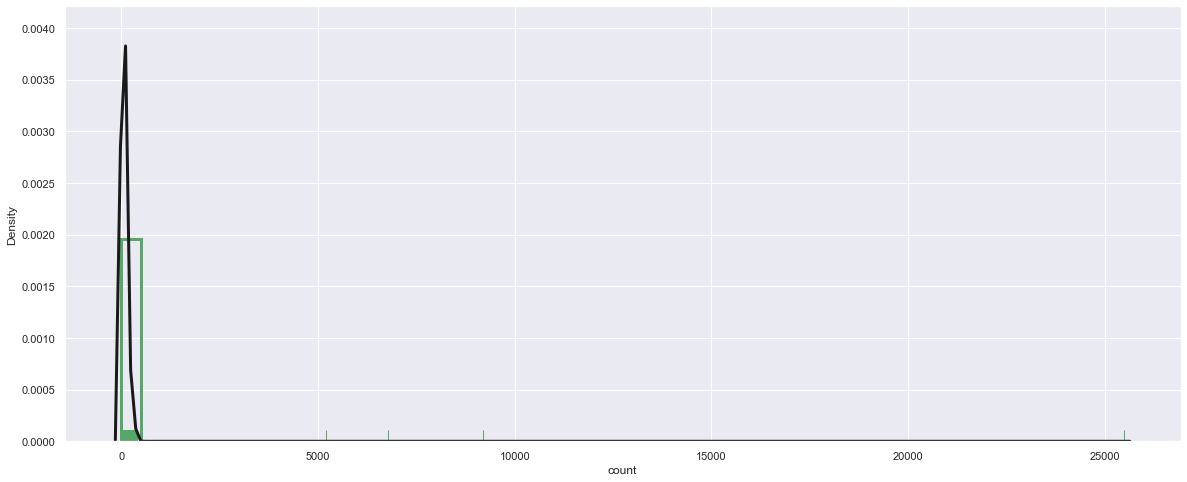

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,8)})

ax = sns.distplot(achats_par_client['count'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

# tracer un boxplot pour voir la distribution, voux pouvez utiliser plt.boxplot()



# ax = sns.boxplot(x='client_id', y='count', data=achats_par_client)
# # ax = sns.swarmplot(x="client_id", y="count", data=achats_par_client, color='#666666')
# plt.show()

Qu'est-ce qu'on remarque ? 


In [ ]:
# --> des clients fous furieux
client_id	count
677	c_1609	25488
6337	c_6714	9187
2724	c_3454	6773
4388	c_4958	5195

In [51]:
achats_par_client.sort_values('count', ascending=False)

,client_id,count
677,c_1609,25488
6337,c_6714,9187
2724,c_3454,6773
4388,c_4958,5195
2513,c_3263,403
...,...,...
1556,c_240,1
5501,c_5962,1
8151,c_8351,1
3855,c_4478,1


c:\bda\tools\python-3.6.8-amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\bda\tools\python-3.6.8-amd64\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


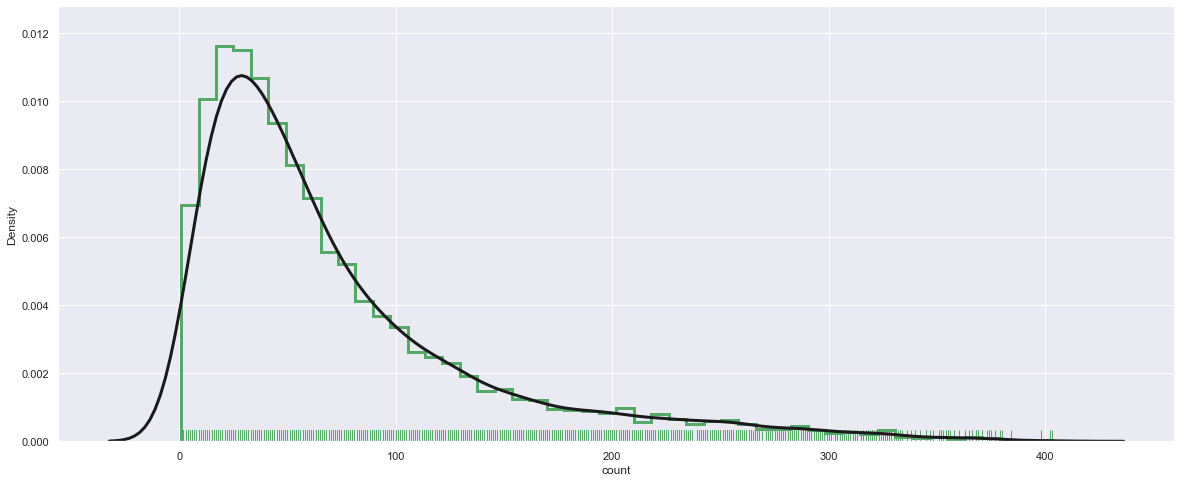

In [53]:
achats_par_client_normaux = achats_par_client[achats_par_client['count']< 1000]
ax = sns.distplot(achats_par_client_normaux['count'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

## 1.2 - Jointure des dataframes

1.2.1 - products & transactions

In [ ]:
# Jointure entre transactions et products en prenant comme clé la colonne 'id_prod'
# jointure externe 
# afin de conserver toutes les lignes de mon fichier transactions.

df_final = pd.merge(transactions,products, on = 'id_prod', how= 'outer')

In [ ]:
#regardons les cas où le produit n'est pas vendu

df_final[df_final._merge=="right_only"]

In [ ]:
print("les produits qui ne sont pas vendus",df_final[df_final._merge=="right_only"].id_prod.unique())

In [ ]:
#on supprime les produits invendus

index = df_final[df_final._merge=="right_only"]

df_final.drop(index, inplace = True)

In [ ]:
#regardons les cas où le produit dans transaction n'est pas trouvé dans products
df_final[df_final._merge=="left_only"]

In [ ]:
df_final[df_final._merge=="left_only"].describe(include = "all")

Un produit a été vendu 221 fois, mais on ne connait pas son prix.
Plusieurs possibilités : 

    - on supprime les lignes -> on sous-estimera le CA
    
    - on fait une imputation 

In [ ]:
# faisons une imputation 

index = df_final[df_final._merge=="left_only"].index #on récupère l'index des lignes qu'il faut modifier 

df_final.loc[index,"price"] = 11.7

df_final.loc[index,"categ"] = 0


### 1.2.1 - ajout de customers

In [ ]:
# faire la jointure 



In [ ]:
# Vérifier si des ventes concernent des clients absents de customers 



In [ ]:
# Vérifier si des clients n'ont fait aucun achat



# 2 Analyse globale du CA

In [ ]:
df_final.head()

In [66]:
# calculer le CA total



## 2.1 Traitement de la date

On aimerait pouvoir faire des analyses du CA par an, par mois, par jour de la semaine, par catégorie de produit.
On s'occupera des analyses des usages de clients dans le chapitre 3 

On a besoin de traiter la date pour pouvoir faire ces analyses. 
On va créer des nouvelles colonnes à parti de ce champ

In [ ]:
# Modification du type de ma colonne date
df_final['date'] = pd.to_datetime(df_final['date'])

In [ ]:
df_final['année'] = df_final['date'].dt.year

In [ ]:
df_final.head()

En vous inspirant de ce qu'on vient de faire, créer :

    un champ mois

    un champ jour du mois

    un champ jour de la semaine


In [ ]:
# A vous de jouer




## 2.2 Analyse calendaire

In [ ]:
#Calcule du CA par année
df_final.groupby("année").price.sum()

In [ ]:
df_final.groupby("année").price.sum().plot(kind = "bar", title="CA par année",ylabel="CA")

En vous inspirant de ce qu'on vient de faire :

- Etudier le CA par mois. Qu'observons nous ? 

- Est-ce qu'il y a un effet fin de mois ? ou début de mois ?

- Est-ce qu'il y a un effet WE? 





In [57]:
# A vous de jouer





## 2.3 Analyse par catégorie



In [60]:
# reprendre le travail ci-dessous et le détailler par categorie




# 3 Analyse des usages des clients

## 3.1 Traitement de l'âge 

In [ ]:
#créons  une colonne âge
df_final['Age'] = 2022 - df_final['birth']

In [ ]:
df_final.groupby("client_id").mean().Age.hist(bins=40)

plt.title("Répartition des clients par âge")

plt.xlabel("Age")

plt.ylabel("Nombre de clients")

Pour analyser les usages liés à l'âge, il est souvent plus pertinent de faire des tranches d'âge



In [ ]:
# On va créer 14 intervalles d'âges :

labels = ['19-24','25-29','30-35','36-40','41-45','46-51','52-56','57-61','62-67','68-72','73-77','78-83','84-88','89-94']


df_final['Age_tranche']= pd.cut(df_final['Age'], 14,labels=labels)

## 3.2 Analyse du chiffre d'affaires par client

In [ ]:
# le nombre de clients uniques
df_final.client_id.value_counts().shape

In [ ]:
# on regroupe mes données par client_id et on calcul le montant de leurs achats.
df_client = df_final.groupby('client_id')[['price']].sum();
df_client.head()

Analyser le chiffre d'affaires par client : 

- est ce qu'il y a des outliers ? 
- si oui, quelle part du CA ils représentent ?
- que peut-on supposer à leur sujet ? Comment les traiter dans notre analyse 
- étudier la distribution du CA par client en dehors de ces clients

In [68]:
# A vous de jouer



## 3.3 Analyse des usages d'achat liés au sexe

### 3.3.1 Calculer le CA par sexe

In [69]:
# A vous de jouer

### 3.3.2 Corrélation : Sexe et Catégorie

Les deux variables sont qualitatives.
On va réaliser le test du Khi² pour vérifier si ces deux variables sont liées.

In [ ]:
# Création de ma table de contingence
X = "sex"
Y = "categ"

cont_1 = df_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1

In [ ]:
# Regardons la distibution si les variables étaient complétement independantes

tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(df_final)
indep = round(tx.dot(ty) / n)

In [ ]:
# regardons où l'écart est le plus important
(cont_1 - indep)/indep

In [ ]:
# importons le module chi2_contingency de la librairie scipy pour faire un chi2
from scipy.stats import chi2_contingency as chi2_contingency

In [ ]:
chi2, p = chi2_contingency(cont_1)

In [ ]:
chi2

Avec une p-value inférieure à 0.05% on peut rejeter l'hypothèse 0 d'indépendance.

In [ ]:
import seaborn as sns


c = cont_1.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le sexe et la catégorie de produit')
plt.show()

On remarque une forte corrélation entre les hommes et la catégorie 1.

### 3.3.3 Test de corrélation : sexe et nombre d'achats

In [ ]:
nb_achats = df_final.groupby(["client_id","sex"],as_index=False)[["session_id"]].count()

In [ ]:
nb_achats[['sex','session_id']].hist(by='sex',alpha = 0.5, bins = 50, sharex=True)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
lm = ols('session_id ~ sex', data = nb_achats).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)

In [ ]:
table

In [ ]:
lm.summary()

## 3.4 Analyse des usages d'achat liés à l'âge¶

### 3.4.1 Corrélation âge et CA

On peut considérer l'âge comme une variable quantitative. Le CA l'est aussi. 

In [ ]:
df_age_ca = df_final[['Age','price']]

In [ ]:
df_age_ca = df_age_ca.groupby('Age').agg({'price':'sum'}).reset_index()

In [ ]:
df_age_ca

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_age_ca["Age"],df_age_ca["price"],'o')
plt.xlabel("Age")
plt.ylabel("ca")
plt.grid()
plt.title('Répartition du CA par âge')
plt.show()

In [ ]:
#corrélation de pearson 
df_age_ca.corr()

In [ ]:
#test sperman
from scipy import stats
from scipy.stats import spearmanr

In [ ]:
stats.spearmanr(df_age_ca['Age'],df_age_ca['price'])

In [ ]:
df_age_ca.corr( method = "spearman")

### 3.4.2 corrélation tranche d'âge et catégorie de produit

In [80]:
#A vous de jouer 

### 3.4.3 corrélation tranche d'âge et fréquence d'achat

### 3.4.4 corrélation tranche d'âge et Panier moyen

# 4 synthèse